In [1]:
import sys, os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
from student import *
from aggregator import *
import matplotlib.pyplot as plt
from analysis import *
from teacher_ensemble import *
import pickle
import tensorflow as tf

In [2]:
states = ["HI", "CA", "PR", "NV", "NM", "OK", "NY", "WA", "AZ",  "MD",
"TX", "VA", "MA", "GA", "CT", "OR", "IL", "RI", "NC", "CO", "DE", "LA", "UT",
"FL", "MS", "SC", "AR", "SD", "AL", "MI", "KS", "ID", "MN", "TN", "OH", "IN",
"MT", "PA", "NE", "MO", "WY", "ND", "WI", "KY", "NH", "ME", "IA", "VT", "WV"] 

In [27]:
target = 0
path = "../checkpoint/"+states[target]+"/"+ states[target] + "_unfair.pkl"
with open(path, "rb") as f:
        tchr = pickle.load(f)
features, labels, group = tchr.dataset

In [28]:
tchr.metrics

{'EOD': 0.3983,
 'SPD': 0.5464,
 'ACC': 0.8406,
 'REC': 0.8046,
 'ACC_TL': '-',
 'REC_TL': '-'}

In [29]:
x_train, x_test, y_train, y_test, g_train, g_test = tchr.splited_data
x_train.shape

(11520, 16)

In [37]:
tmp_x_train = pd.DataFrame(x_train, columns=ACSEmployment.features)
tmp_x_train.insert(0, ACSEmployment.target, y_train)
tmp_x_train[[ACSEmployment.group]].value_counts(normalize=True)

RAC1P
2.0      0.539149
1.0      0.460851
Name: proportion, dtype: float64

In [35]:
sts = tmp_x_train[[ACSEmployment.group, ACSEmployment.target]].value_counts(normalize=True)
sts #0.52 vs 

RAC1P  ESR  
2.0    False    0.406858
1.0    True     0.323872
       False    0.136979
2.0    True     0.132292
Name: proportion, dtype: float64

In [32]:
tmp_x_train[tmp_x_train[ACSEmployment.target]==True]

,ESR,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,RAC1P
4886,True,45.0,20.0,1.0,1.0,2.0,0.0,1.0,1.0,4.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0
1889,True,63.0,19.0,1.0,0.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0
1766,True,54.0,21.0,5.0,13.0,2.0,0.0,1.0,1.0,4.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0
8088,True,34.0,22.0,5.0,2.0,2.0,0.0,1.0,1.0,4.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0
6703,True,30.0,24.0,1.0,5.0,2.0,0.0,1.0,1.0,4.0,4.0,1.0,2.0,2.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,True,28.0,19.0,5.0,13.0,2.0,0.0,1.0,3.0,4.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0
14275,True,37.0,20.0,1.0,0.0,2.0,0.0,1.0,3.0,4.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0
2169,True,43.0,20.0,1.0,1.0,2.0,0.0,4.0,1.0,4.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0
10112,True,62.0,19.0,1.0,0.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0


In [33]:
p_grp = tmp_x_train[(tmp_x_train[ACSEmployment.group] == 1) & (tmp_x_train[ACSEmployment.target] == True)].shape[0]
up_grp = tmp_x_train[(tmp_x_train[ACSEmployment.group] == 2) & (tmp_x_train[ACSEmployment.target] == True)].shape[0]
p_grp, up_grp 

(3731, 1524)

In [34]:
up_grp/11520, p_grp/11520 #0.24 vs 0.19

(0.13229166666666667, 0.3238715277777778)

In [10]:
g_train

array([1, 2, 2, ..., 2, 1, 1])

In [224]:
pd.DataFrame(x_train, columns=ACSEmployment.features)

,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,RAC1P
0,31.0,20.0,1.0,1.0,2.0,0.0,1.0,1.0,4.0,4.0,1.0,2.0,2.0,2.0,2.0,1.0
1,50.0,18.0,5.0,0.0,2.0,0.0,1.0,1.0,4.0,4.0,1.0,2.0,2.0,2.0,2.0,1.0
2,2.0,0.0,5.0,2.0,2.0,5.0,1.0,1.0,0.0,4.0,1.0,2.0,2.0,0.0,1.0,1.0
3,14.0,9.0,5.0,2.0,2.0,7.0,1.0,3.0,0.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0
4,58.0,21.0,1.0,1.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54139,20.0,16.0,5.0,5.0,2.0,0.0,1.0,3.0,4.0,4.0,1.0,2.0,2.0,2.0,1.0,1.0
54140,4.0,2.0,5.0,2.0,2.0,1.0,1.0,1.0,0.0,4.0,1.0,2.0,2.0,0.0,1.0,1.0
54141,50.0,16.0,3.0,0.0,2.0,0.0,1.0,1.0,4.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0
54142,62.0,19.0,1.0,0.0,2.0,0.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0


In [150]:
D_2 = x_train.copy()
D_2[ACSEmployment.group] = D_2[ACSEmployment.group].map({1: 2, 2:2})
D_2

,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,RAC1P
19365,53.0,16.0,1.0,0.0,2.0,0.0,1.0,1.0,4.0,4.0,1.0,2.0,2.0,2.0,2.0,2
20336,57.0,17.0,1.0,1.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,2
26473,56.0,16.0,1.0,1.0,2.0,0.0,1.0,3.0,4.0,2.0,1.0,2.0,2.0,2.0,1.0,2
20203,56.0,22.0,3.0,0.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,2
26977,24.0,16.0,5.0,0.0,2.0,0.0,1.0,3.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7801,9.0,8.0,5.0,2.0,2.0,1.0,1.0,1.0,0.0,4.0,1.0,2.0,2.0,2.0,1.0,2
27719,87.0,19.0,3.0,0.0,1.0,0.0,1.0,1.0,4.0,4.0,1.0,2.0,2.0,2.0,2.0,2
24710,60.0,16.0,1.0,0.0,1.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,2
8668,48.0,20.0,3.0,0.0,2.0,0.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2


In [151]:
D_1 = x_train.copy()
D_1[ACSEmployment.group] = D_1[ACSEmployment.group].map({1: 1, 2:1})
D_1

,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,RAC1P
19365,53.0,16.0,1.0,0.0,2.0,0.0,1.0,1.0,4.0,4.0,1.0,2.0,2.0,2.0,2.0,1
20336,57.0,17.0,1.0,1.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,1
26473,56.0,16.0,1.0,1.0,2.0,0.0,1.0,3.0,4.0,2.0,1.0,2.0,2.0,2.0,1.0,1
20203,56.0,22.0,3.0,0.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,1
26977,24.0,16.0,5.0,0.0,2.0,0.0,1.0,3.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7801,9.0,8.0,5.0,2.0,2.0,1.0,1.0,1.0,0.0,4.0,1.0,2.0,2.0,2.0,1.0,1
27719,87.0,19.0,3.0,0.0,1.0,0.0,1.0,1.0,4.0,4.0,1.0,2.0,2.0,2.0,2.0,1
24710,60.0,16.0,1.0,0.0,1.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,1
8668,48.0,20.0,3.0,0.0,2.0,0.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1


In [152]:
# to numpy
np_d_1= np.asarray(D_1)
np_d_2= np.asarray(D_2)

In [153]:
np_labels = np.asarray(y_train)
tchr.model.evaluate(np_d_1, np_labels)

942/942 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - accuracy: 0.7714 - loss: 0.4219 - recall: 0.5362


[0.42646899819374084, 0.7696062326431274, 0.5322389006614685]

In [154]:
print(x_train.shape, " vs ", np_d_1.shape)

(30118, 16)  vs  (30118, 16)


In [155]:
preds1 = tchr.model.predict(np_d_1)
preds2 = tchr.model.predict(np_d_2)
preds1

942/942 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
942/942 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step


array([[0.40114433],
       [0.3825242 ],
       [0.59623563],
       ...,
       [0.13743082],
       [0.83098376],
       [0.14926624]], dtype=float32)

In [157]:
n = len(preds1)
reconst_attr = []
rac=0
for i in range(n):
    y_1 = preds1[i]
    y_2 = preds2[i]
    dist = [abs(np.round(y_2) - y_2), abs(np.round(y_1) - y_1)]
    rac = np.argmin(dist)
    reconst_attr.append(int(rac))

In [161]:
ori_data = x_train.copy()
ori_data[ACSEmployment.group] = ori_data[ACSEmployment.group].map({1: 1, 2: 0})
ori_data.insert(15, "RACREC", reconst_attr)
#ori_data

In [162]:
eq = ori_data[ori_data[ACSEmployment.group] == ori_data["RACREC"]].shape
neq = ori_data[ori_data[ACSEmployment.group] != ori_data["RACREC"]].shape
eq[0]/(eq[0] + neq[0])

0.6019323992296965

In [228]:
def attack0(teacher_id, fair=False):
    if fair:
        path = "../checkpoint/"+states[teacher_id]+"/"+ states[teacher_id] + "_fair.pkl"
    else:
        path = "../checkpoint/"+states[teacher_id]+"/"+ states[teacher_id] + "_unfair.pkl"
    with open(path, "rb") as f:
            tchr = pickle.load(f)
    x_train, x_test, y_train, y_test, g_train, g_test = tchr.splited_data
    if  not isinstance(x_train, pd.DataFrame):
        x_train = pd.DataFrame(x_train, columns=ACSEmployment.features)
    D_2 = x_train.copy()
    D_2[ACSEmployment.group] = D_2[ACSEmployment.group].map({1: 2, 2:2})
    D_1 = x_train.copy()
    D_1[ACSEmployment.group] = D_1[ACSEmployment.group].map({1: 1, 2:1})
    # to numpy
    np_d_1= np.asarray(D_1)
    np_d_2= np.asarray(D_2)
    preds1 = tchr.model.predict(np_d_1)
    preds2 = tchr.model.predict(np_d_2)
    n = len(preds1)
    reconst_attr = []
    rac=0
    for i in range(n):
        y_1 = preds1[i]
        y_2 = preds2[i]
        dist = [abs(np.round(y_2) - y_2), abs(np.round(y_1) - y_1)]
        rac = np.argmin(dist)
        reconst_attr.append(int(rac))
    ori_data = x_train.copy()
    ori_data[ACSEmployment.group] = ori_data[ACSEmployment.group].map({1: 1, 2: 0})
    ori_data.insert(15, "RACREC", reconst_attr)
    eq = ori_data[ori_data[ACSEmployment.group] == ori_data["RACREC"]].shape
    neq = ori_data[ori_data[ACSEmployment.group] != ori_data["RACREC"]].shape
    attack_acc = eq[0]/(eq[0] + neq[0])
    return attack_acc

attack0(0, True)

360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step


0.6353298611111111

In [258]:
stats = {}
for i in range(len(states)):
    stats[states[i]] = [attack0(i), attack0(i, True)]
print("Done")

360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step
9471/9471 ━━━━━━━━━━━━━━━━━━━━ 7s 742us/step
9471/9471 ━━━━━━━━━━━━━━━━━━━━ 7s 732us/step
9471/9471 ━━━━━━━━━━━━━━━━━━━━ 6s 606us/step
9471/9471 ━━━━━━━━━━━━━━━━━━━━ 7s 736us/step
703/703 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step
703/703 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step
703/703 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step
703/703 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step
724/724 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step
724/724 ━━━━━━━━━━━━━━━━━━━━ 1s 722us/step
724/724 ━━━━━━━━━━━━━━━━━━━━ 1s 750us/step
724/724 ━━━━━━━━━━━━━━━━━━━━ 1s 692us/step
482/482 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step
482/482 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step
482/482 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step
482/482 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step
942/942 ━━━━━━━━━━━━━━━━━━━━ 1s 782us/step
942/942 ━━━━━━━━━━━━━━━━━━━━ 1s 737us/step
942/942 ━━━━━━━━━━━━━━━━━━━━ 1s 750us/step
942

In [251]:
len(stats.keys())

10

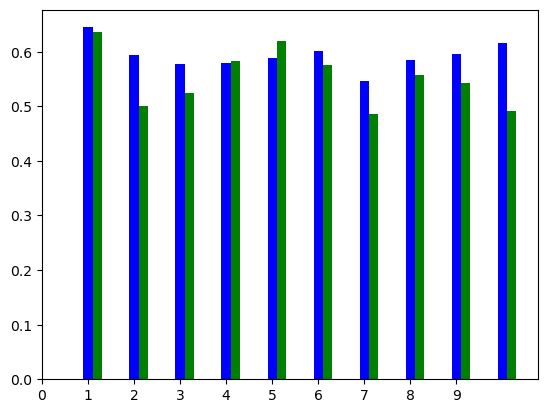

In [257]:
b_width = 0.2
x = 0
for i in range(10):
    plt.bar([i+1, i+1 + b_width], stats[states[i]], width=b_width, color=["blue", "green"], label=["unfair", "fair"])
    #x += 2*b_width+0.5
plt.xticks(list(range(len(stats.keys()))))
plt.show()

In [164]:
from art.attacks.inference.attribute_inference import AttributeInferenceBaseline, AttributeInferenceBlackBox

attact_train_ratio = 0.5
attack_train_size = int(len(x_train)*attack_train_ratio)

ImportError: Numba needs NumPy 1.24 or less